In [ ]:
import pandas as pd
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
# import zipfile

# # Specify the path to your zip file
# zip_file_path = '/content/drive/MyDrive/datasets/Land cover classification/archive.zip'

# # Specify the directory where you want to extract the contents
# extract_to_directory = '/content/drive/MyDrive/datasets/Land cover classification/unzip/'

# # Open the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # Extract all the contents to the specified directory
#     zip_ref.extractall(extract_to_directory)

# print("Extraction complete.")


In [ ]:

# # Specify the main folder path
# main_folder_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/'

# # Initialize variables to store the counts
# total_images = 0
# folder_image_counts = {}
# num_subfolders = 0  # Initialize the counter for subfolders

# # Iterate through the contents of the main folder
# for item in os.listdir(main_folder_path):
#     item_path = os.path.join(main_folder_path, item)
#     if os.path.isdir(item_path):
#         # If the item is a directory, increment the subfolder counter
#         num_subfolders += 1

#         # Count the number of images in the folder
#         images_in_folder = sum(1 for file_name in os.listdir(item_path) if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
#         folder_image_counts[item] = images_in_folder
#         total_images += images_in_folder

# # Print the number of subfolders
# print(f"Number of subfolders: {num_subfolders}")

# # Print the image counts by folder
# for folder, count in folder_image_counts.items():
#     print(f"Images in '{folder}': {count}")

# # Print the total number of images
# print(f"Total images: {total_images}")


In [ ]:

# Specify the main folder path
main_folder_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/'

# Load CSV files that categorize images into training, testing, and validation sets
train_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/train.csv'
test_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/test.csv'
validation_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/validation.csv'

# Read CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
validation_df = pd.read_csv(validation_csv_path)

print("Training samples",train_df.shape)
print("Testing samples",test_df.shape)
print("validation samples",validation_df.shape)

Training samples (18900, 4)
Testing samples (2700, 4)
validation samples (5400, 4)


In [ ]:
train_df.head()

,Unnamed: 0,Filename,Label,ClassName
0,16257,AnnualCrop/AnnualCrop_142.jpg,0,AnnualCrop
1,3297,HerbaceousVegetation/HerbaceousVegetation_2835...,2,HerbaceousVegetation
2,17881,PermanentCrop/PermanentCrop_1073.jpg,6,PermanentCrop
3,2223,Industrial/Industrial_453.jpg,4,Industrial
4,4887,HerbaceousVegetation/HerbaceousVegetation_1810...,2,HerbaceousVegetation


In [ ]:

# Specify the main folder path
main_folder_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/'

# Load CSV files that categorize images into training, testing, and validation sets
train_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/train.csv'
test_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/test.csv'
validation_csv_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/validation.csv'

# Read CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
validation_df = pd.read_csv(validation_csv_path)

# Join the main folder path with the relative paths in the CSV files for training and testing
train_df['Filename'] = main_folder_path + train_df['Filename']
test_df['Filename'] = main_folder_path + test_df['Filename']
validation_df['Filename'] = main_folder_path + validation_df['Filename']


# # Print the updated DataFrame
print(train_df.head())
# print(test_df.head())

   Unnamed: 0                                           Filename  Label  \
0       16257  /content/drive/MyDrive/datasets/Land cover cla...      0   
1        3297  /content/drive/MyDrive/datasets/Land cover cla...      2   
2       17881  /content/drive/MyDrive/datasets/Land cover cla...      6   
3        2223  /content/drive/MyDrive/datasets/Land cover cla...      4   
4        4887  /content/drive/MyDrive/datasets/Land cover cla...      2   

              ClassName  
0            AnnualCrop  
1  HerbaceousVegetation  
2         PermanentCrop  
3            Industrial  
4  HerbaceousVegetation  


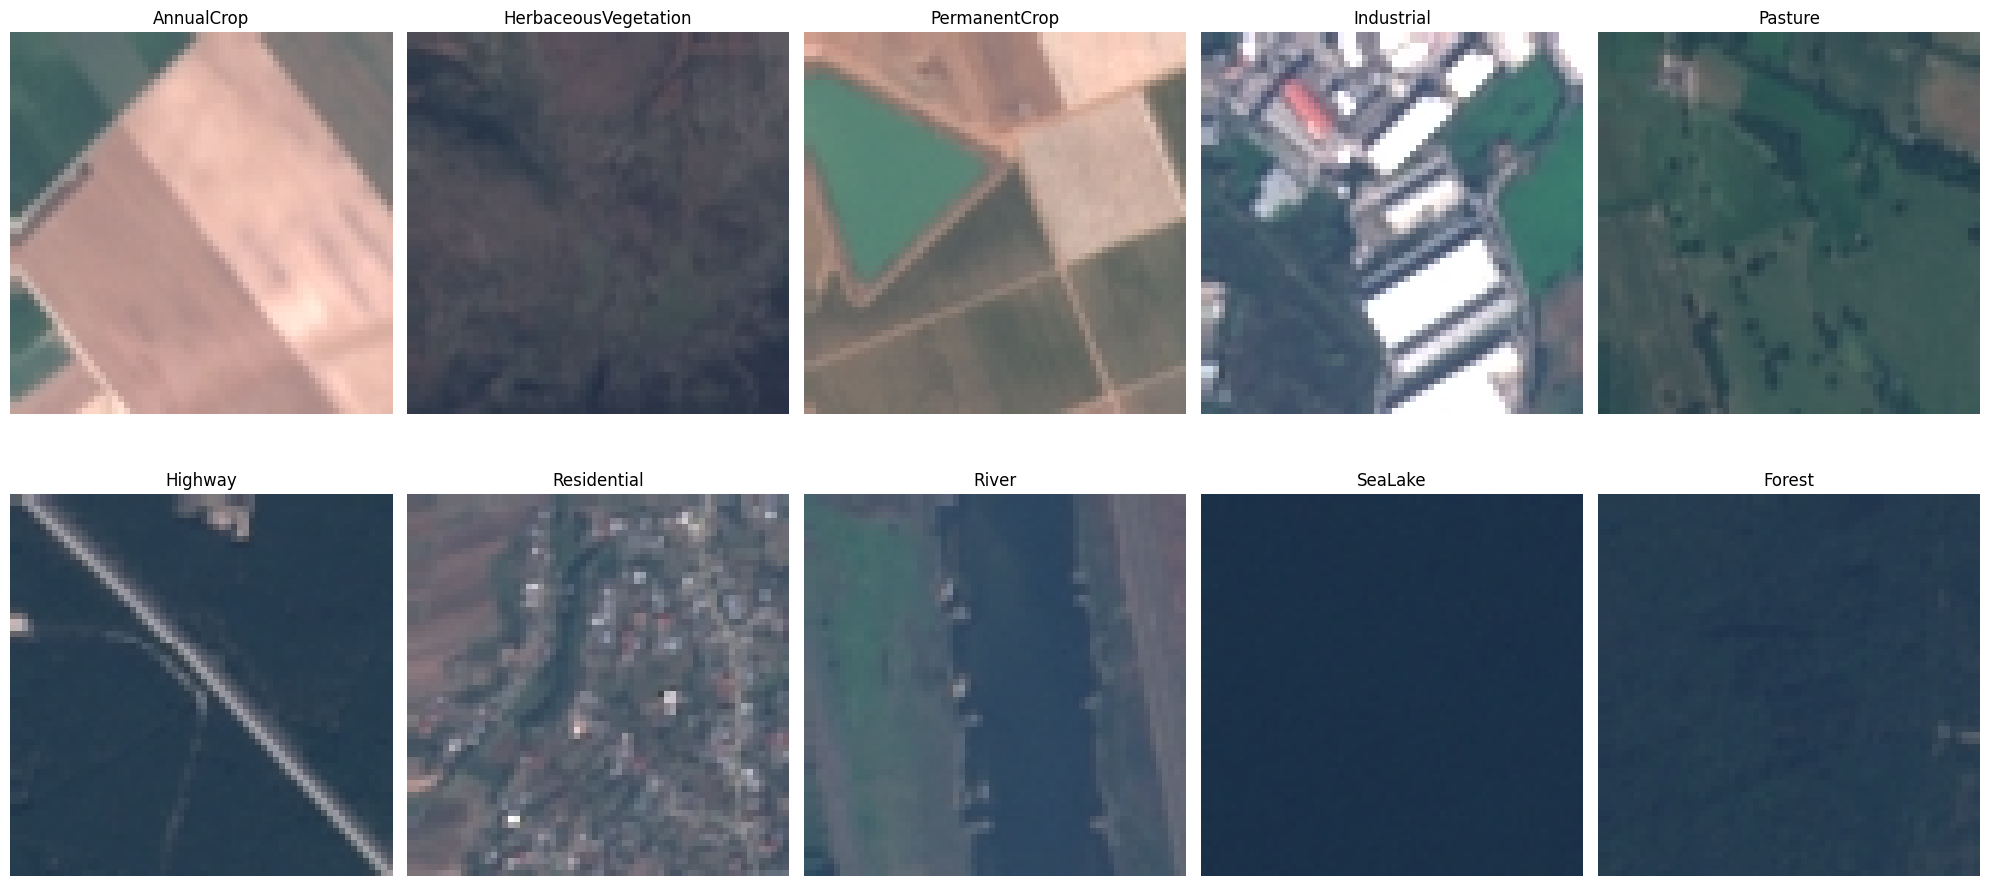

In [ ]:


# Function to display sample images with labels for all categories
def display_images_for_all_categories(dataframe):
    # Get unique categories
    categories = dataframe['Filename'].apply(lambda x: x.split('/')[-1].split('_')[0]).unique()

    # Create a 2 by 5 subplot grid
    num_rows = 2
    num_cols = 5
    plt.figure(figsize=(20, 10))

    # Iterate over categories
    for i, category in enumerate(categories):
        # Get sample image path for the category
        sample_path = dataframe[dataframe['Filename'].str.contains(category)].iloc[0]['Filename']

        # Extract label from the image path
        label = category

        # Load and plot the sample image
        img = Image.open(sample_path)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images with labels for all categories from train_df
display_images_for_all_categories(train_df)


In [ ]:
train_df

,Unnamed: 0,Filename,Label,ClassName
0,16257,/content/drive/MyDrive/datasets/Land cover cla...,0,AnnualCrop
1,3297,/content/drive/MyDrive/datasets/Land cover cla...,2,HerbaceousVegetation
2,17881,/content/drive/MyDrive/datasets/Land cover cla...,6,PermanentCrop
3,2223,/content/drive/MyDrive/datasets/Land cover cla...,4,Industrial
4,4887,/content/drive/MyDrive/datasets/Land cover cla...,2,HerbaceousVegetation
...,...,...,...,...
18895,4498,/content/drive/MyDrive/datasets/Land cover cla...,2,HerbaceousVegetation
18896,1149,/content/drive/MyDrive/datasets/Land cover cla...,5,Pasture
18897,15489,/content/drive/MyDrive/datasets/Land cover cla...,0,AnnualCrop
18898,6287,/content/drive/MyDrive/datasets/Land cover cla...,7,Residential


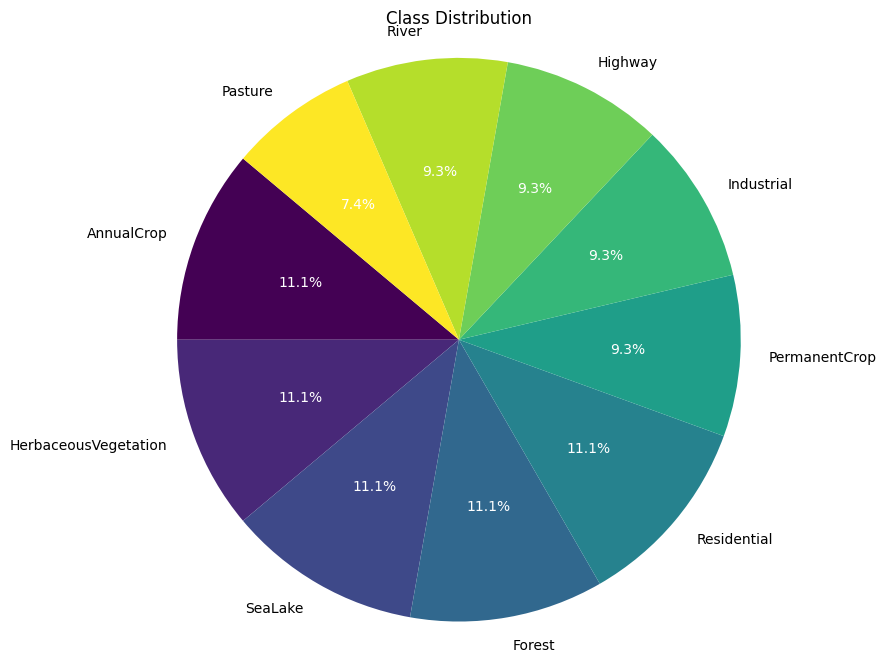

In [ ]:

import numpy as np

# Assuming you have a DataFrame named train_df with a column 'ClassName' containing the class names
class_counts = train_df['ClassName'].value_counts()

# Sort class counts in descending order
class_counts_sorted = class_counts.sort_values(ascending=False)

# Generate colors for pie chart slices
num_classes = len(class_counts_sorted)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

plt.figure(figsize=(8, 8))
pie = plt.pie(class_counts_sorted, labels=class_counts_sorted.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the color of percentage labels to white
for text in pie[2]:
    text.set_color('white')

plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator should not augment the data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Rest of your code...


# Image size expected by ResNet50
img_width, img_height = 224, 224

# Number of classes
num_classes = 5


# Filter train_df and validation_df to include only the specified categories
selected_categories = ['Forest', 'River', 'SeaLake', 'Residential', 'Industrial']
train_df_filtered = train_df[train_df['ClassName'].isin(selected_categories)]
validation_df_filtered = validation_df[validation_df['ClassName'].isin(selected_categories)]
test_df_filtered = test_df[test_df['ClassName'].isin(selected_categories)]

# Create data generators using the filtered dataframes
train_generator_filtered = train_datagen.flow_from_dataframe(
    dataframe=train_df_filtered,
    x_col='Filename',
    y_col='ClassName',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator_filtered = validation_datagen.flow_from_dataframe(
    dataframe=validation_df_filtered,
    x_col='Filename',
    y_col='ClassName',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


test_datagen = ImageDataGenerator(rescale=1.0/255)

# Assuming you have a dataframe named test_df containing image paths in the 'Filename' column
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df_filtered,
    x_col='Filename',  # Column containing image paths
    y_col='ClassName',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 9800 validated image filenames belonging to 5 classes.
Found 2800 validated image filenames belonging to 5 classes.
Found 1400 validated image filenames belonging to 5 classes.


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
306/306 [==============================] - 2880s 9s/step - loss: 1.2393 - accuracy: 0.4307 - val_loss: 0.9867 - val_accuracy: 0.5323
Epoch 2/10
306/306 [==============================] - 136s 445ms/step - loss: 0.9541 - accuracy: 0.5364 - val_loss: 0.8446 - val_accuracy: 0.5934
Epoch 3/10
306/306 [==============================] - 132s 430ms/step - loss: 0.8813 - accuracy: 0.5708 - val_loss: 0.8266 - val_accuracy: 0.6261
Epoch 4/10
306/306 [==============================] - 130s 425ms/step - loss: 0.8028 - accuracy: 0.6136 - val_loss: 0.8282 - val_accuracy: 0.5751
Epoch 5/10
306/306 [==============================] - 131s 427ms/step - loss: 0.7965 - accuracy: 0.6152 - val_loss: 0.7511 - val_accuracy: 0.6193
Epoch 6/10
306/306 [==============================] - 132s 431ms/step - loss: 0.7521 - accuracy: 0.6491 - val_loss: 0.7130 - val_accuracy: 0.6361
Epoch 7/10
306/306 [==============================] - 130s 42

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


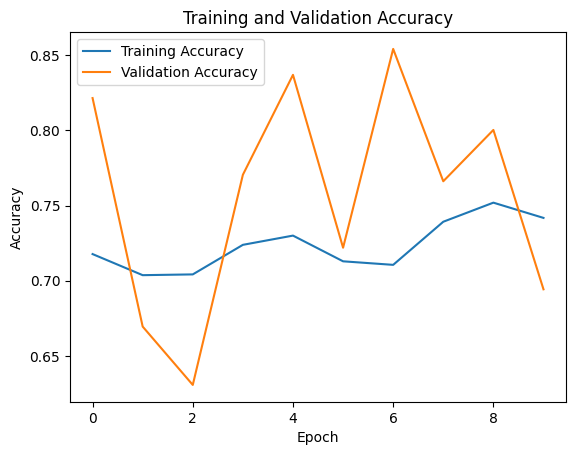

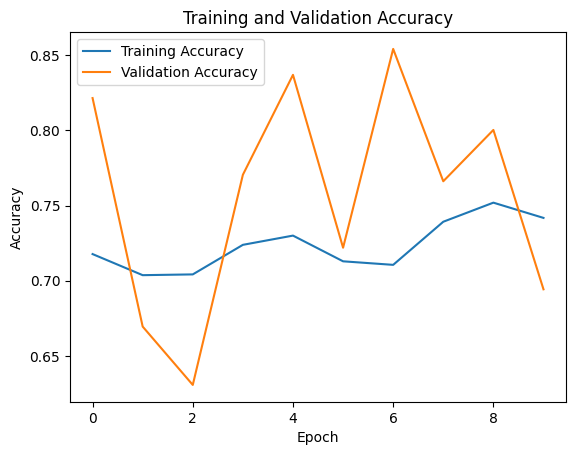

In [ ]:

# Load ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_filtered,
    steps_per_epoch=train_generator_filtered.samples // train_generator_filtered.batch_size,
    epochs=10,
    validation_data=validation_generator_filtered,
    validation_steps=validation_generator_filtered.samples // validation_generator_filtered.batch_size
)


# Save the trained model
model.save('/content/drive/MyDrive/saved_model/resnet50_land_cover.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



In [ ]:

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


44/44 [==============================] - 285s 7s/step - loss: 0.6121 - accuracy: 0.6971
Test Accuracy: 0.6971428394317627


# DenseNet

Epoch 1/10
306/306 [==============================] - 142s 442ms/step - loss: 0.1583 - accuracy: 0.9443 - val_loss: 0.1376 - val_accuracy: 0.9533
Epoch 2/10
306/306 [==============================] - 131s 429ms/step - loss: 0.0970 - accuracy: 0.9670 - val_loss: 0.1197 - val_accuracy: 0.9594
Epoch 3/10
306/306 [==============================] - 131s 427ms/step - loss: 0.0820 - accuracy: 0.9718 - val_loss: 0.1028 - val_accuracy: 0.9662
Epoch 4/10
306/306 [==============================] - 130s 426ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.0951 - val_accuracy: 0.9673
Epoch 5/10
306/306 [==============================] - 131s 428ms/step - loss: 0.0662 - accuracy: 0.9767 - val_loss: 0.1111 - val_accuracy: 0.9662
Epoch 6/10
306/306 [==============================] - 131s 428ms/step - loss: 0.0709 - accuracy: 0.9734 - val_loss: 0.1163 - val_accuracy: 0.9637
Epoch 7/10
306/306 [==============================] - 130s 425ms/step - loss: 0.0653 - accuracy: 0.9758 - val_loss: 0.0947 -

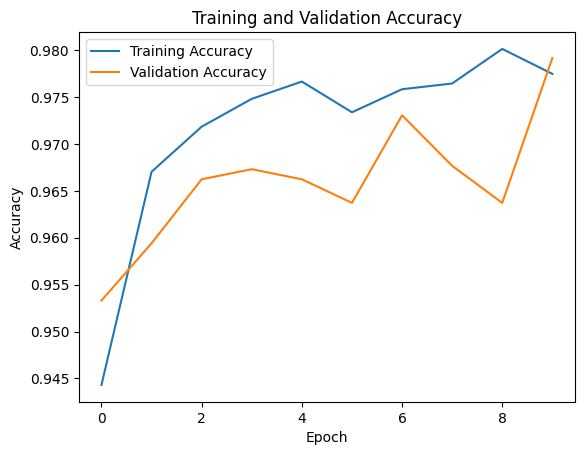

44/44 [==============================] - 8s 187ms/step - loss: 0.0547 - accuracy: 0.9771
Test Accuracy: 0.977142870426178


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
landfrom tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

# Image size expected by DenseNet
img_width, img_height = 224, 224

# Number of classes
num_classes = 5

# Load DenseNet model without top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_filtered,
    steps_per_epoch=train_generator_filtered.samples // train_generator_filtered.batch_size,
    epochs=10,
    validation_data=validation_generator_filtered,
    validation_steps=validation_generator_filtered.samples // validation_generator_filtered.batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


model.save('/content/drive/MyDrive/saved_model/Densenet_land_cover.h5')





# Attention mechanism

Epoch 1/10
306/306 [==============================] - 139s 433ms/step - loss: 0.4329 - accuracy: 0.8670 - val_loss: 0.3867 - val_accuracy: 0.9073
Epoch 2/10
306/306 [==============================] - 132s 431ms/step - loss: 0.3133 - accuracy: 0.9115 - val_loss: 0.2419 - val_accuracy: 0.9379
Epoch 3/10
306/306 [==============================] - 131s 429ms/step - loss: 0.3331 - accuracy: 0.9109 - val_loss: 0.2558 - val_accuracy: 0.9411
Epoch 4/10
306/306 [==============================] - 129s 422ms/step - loss: 0.2855 - accuracy: 0.9222 - val_loss: 0.2597 - val_accuracy: 0.9368
Epoch 5/10
306/306 [==============================] - 131s 429ms/step - loss: 0.3583 - accuracy: 0.8949 - val_loss: 0.3914 - val_accuracy: 0.8980
Epoch 6/10
306/306 [==============================] - 130s 426ms/step - loss: 0.2307 - accuracy: 0.9404 - val_loss: 0.2955 - val_accuracy: 0.9386
Epoch 7/10
306/306 [==============================] - 128s 419ms/step - loss: 0.3090 - accuracy: 0.9229 - val_loss: 0.3678 -

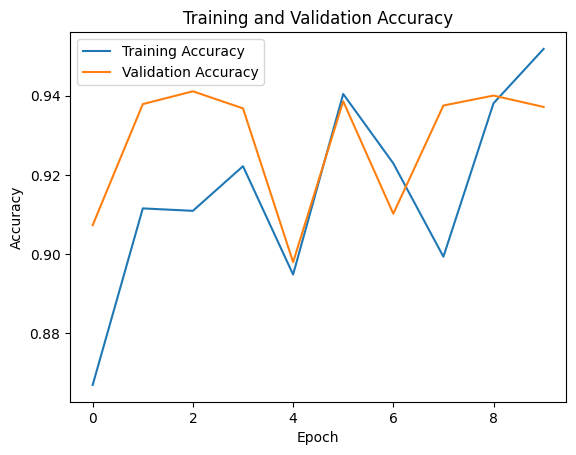

44/44 [==============================] - 5s 104ms/step - loss: 0.2099 - accuracy: 0.9493
Test Accuracy: 0.9492856860160828


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

# Image size expected by DenseNet
img_width, img_height = 224, 224

# Number of classes
num_classes = 5

# Load DenseNet model without top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add attention mechanism layer
attention_layer = Attention()

# Add custom classification layers with attention
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
attention_output = attention_layer([x, x])
output = Dense(num_classes, activation='softmax')(attention_output)

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_filtered,
    steps_per_epoch=train_generator_filtered.samples // train_generator_filtered.batch_size,
    epochs=10,
    validation_data=validation_generator_filtered,
    validation_steps=validation_generator_filtered.samples // validation_generator_filtered.batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save('/content/drive/MyDrive/saved_model/Densenet_land_cover_with_attention.h5')


# Comparative analysis

# SHAP tools

In [ ]:
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Attention

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_model/Densenet_land_cover_with_attention.h5', custom_objects={'Attention': Attention})

# Make predictions on test data
y_pred = loaded_model.predict(test_generator)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(true_labels, y_pred_labels)
print("Cohen's Kappa Coefficient:", kappa)


44/44 [==============================] - 656s 15s/step
Cohen's Kappa Coefficient: 0.008018400792256353


Model 1:
44/44 [==============================] - 6s 95ms/step
Classification Report:
              precision    recall  f1-score   support

      Forest       0.20      0.23      0.21       300
       River       0.19      0.19      0.19       250
     SeaLake       0.23      0.23      0.23       300
 Residential       0.19      0.18      0.19       250
  Industrial       0.20      0.17      0.18       300

    accuracy                           0.20      1400
   macro avg       0.20      0.20      0.20      1400
weighted avg       0.20      0.20      0.20      1400

Confusion Matrix:


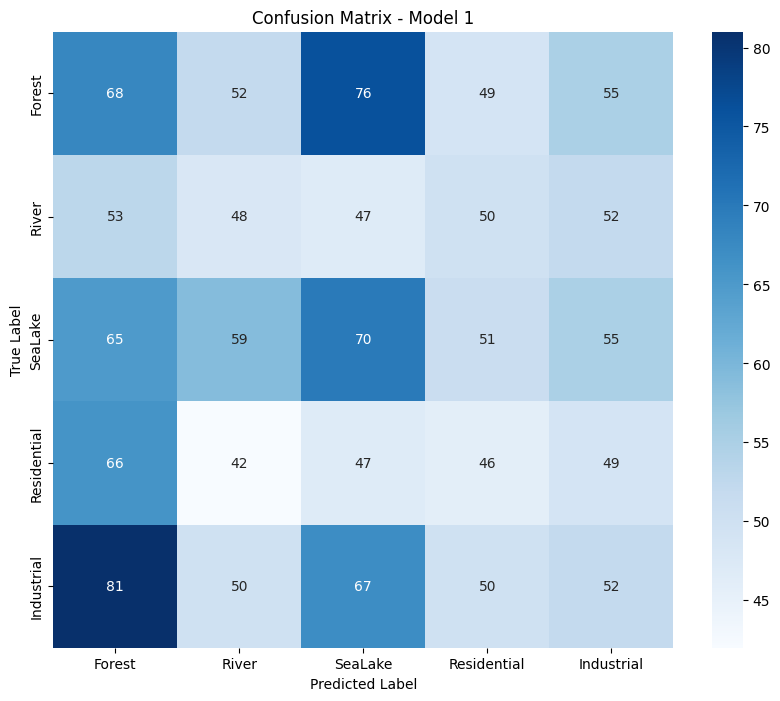



Model 2:
44/44 [==============================] - 6s 98ms/step
Classification Report:
              precision    recall  f1-score   support

      Forest       0.19      0.20      0.20       300
       River       0.18      0.17      0.17       250
     SeaLake       0.25      0.26      0.25       300
 Residential       0.18      0.18      0.18       250
  Industrial       0.18      0.18      0.18       300

    accuracy                           0.20      1400
   macro avg       0.20      0.20      0.20      1400
weighted avg       0.20      0.20      0.20      1400

Confusion Matrix:


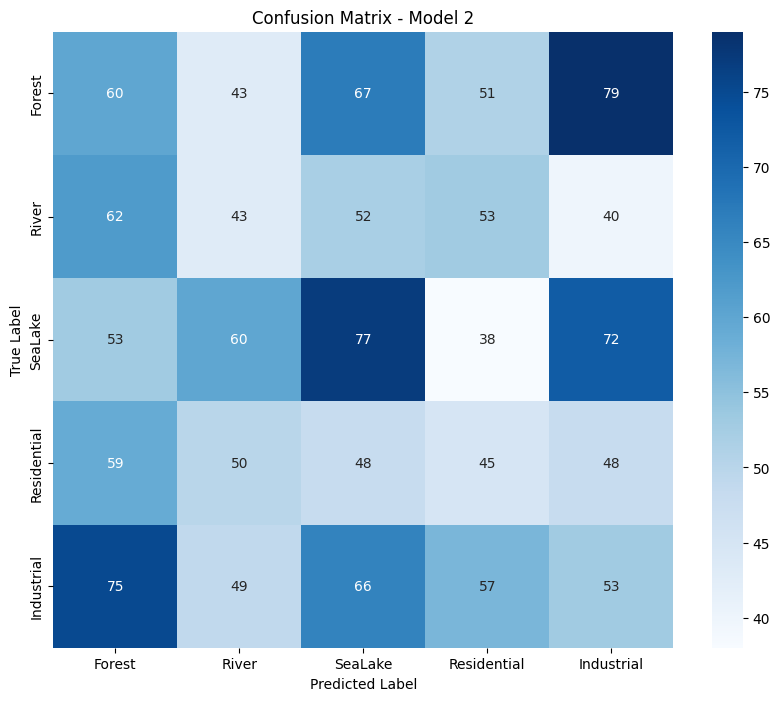



Model 3:
44/44 [==============================] - 5s 103ms/step
Classification Report:
              precision    recall  f1-score   support

      Forest       0.18      0.06      0.09       300
       River       0.14      0.13      0.13       250
     SeaLake       0.22      0.25      0.24       300
 Residential       0.22      0.12      0.15       250
  Industrial       0.21      0.42      0.28       300

    accuracy                           0.20      1400
   macro avg       0.19      0.20      0.18      1400
weighted avg       0.20      0.20      0.18      1400

Confusion Matrix:


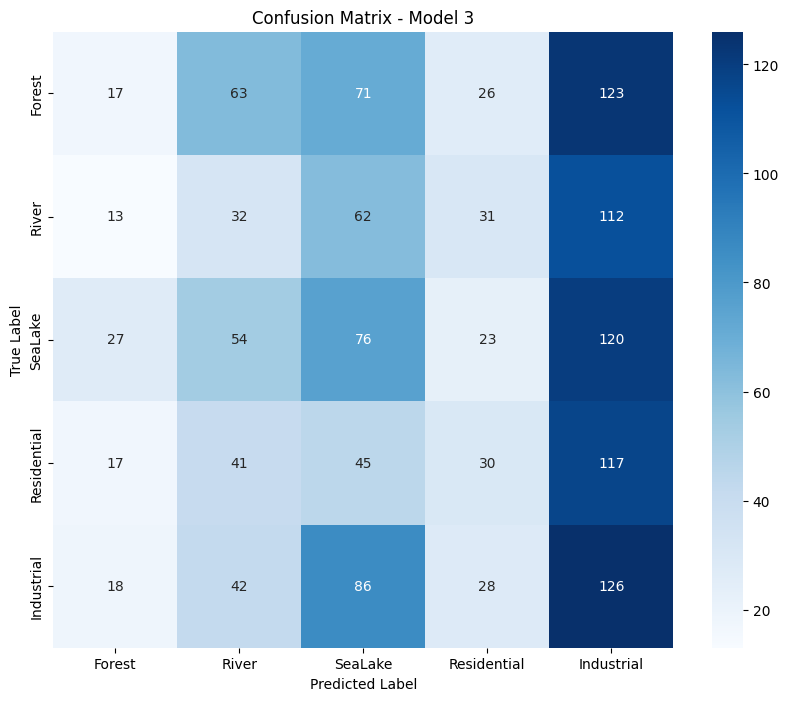

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each loaded model
for i, model in enumerate(models):
    print(f"Model {i+1}:")
    # Make predictions on test data
    y_pred = model.predict(test_generator)

    # Convert probabilities to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Get true labels
    true_labels = test_generator.classes

    # Print classification report
    print("Classification Report:")
    print(classification_report(true_labels, y_pred_labels, target_names=selected_categories))

    # Print confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(true_labels, y_pred_labels)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_categories, yticklabels=selected_categories)
    plt.title(f"Confusion Matrix - Model {i+1}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\n")


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.2 MB/s eta 0:00:00


In [ ]:
def display_image_with_labels(image_path):
    # Load the image
    image = plt.imread(image_path)
    # Extract the actual label from the image path
    actual_label = os.path.basename(os.path.dirname(image_path))
    # Predict the label
    predicted_label_index = predict_label(image_path)
    # Get the predicted label name
    predicted_label = class_names[predicted_label_index]

    # Display the image
    plt.imshow(image)
    plt.axis('off')

    # Calculate text position for actual label
    actual_label_width = len(actual_label) * 8  # Adjust the multiplier as needed
    actual_label_x = (image.shape[1] - actual_label_width)  # Adjust the positioning here
    plt.text(actual_label_x, image.shape[0] - 15, 'Actual: ' + actual_label, fontsize=12, color='green', ha='center')

    # Calculate text position for predicted label
    predicted_label_x = (image.shape[1] - len(predicted_label) * 8) / 2  # Adjust the multiplier as needed
    plt.text(predicted_label_x, image.shape[0] - 5, 'Predicted: ' + predicted_label, fontsize=12, color='white', ha='center')


1/1 [==============================] - 0s 27ms/step


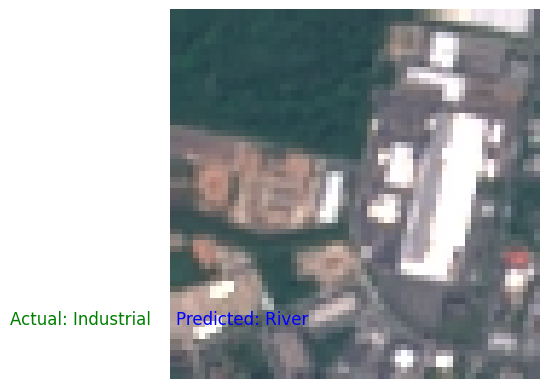

In [ ]:

# Example usage
test_image_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/Industrial/Industrial_1.jpg'  # Replace with the path to your test image
display_image_with_labels(test_image_path)
plt.show()


1/1 [==============================] - 0s 27ms/step


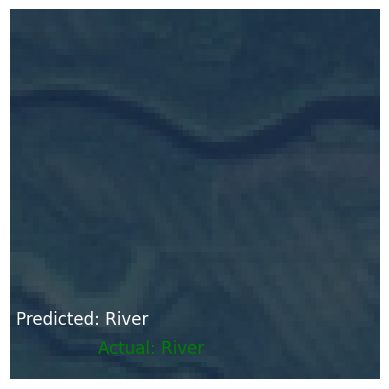

In [ ]:
# Example usage
test_image_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/River/River_1000.jpg'  # Replace with the path to your test image
display_image_with_labels(test_image_path)
plt.show()

1/1 [==============================] - 0s 33ms/step


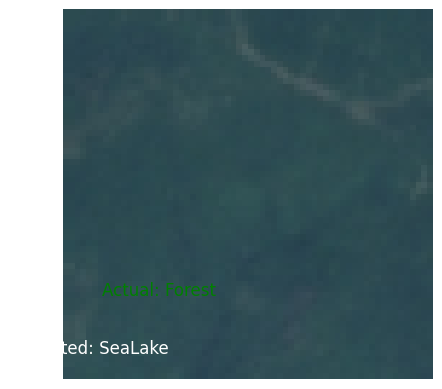

In [ ]:
# Example usage
test_image_path = '/content/drive/MyDrive/datasets/Land cover classification/unzip/EuroSAT/Forest/Forest_1044.jpg'  # Replace with the path to your test image
display_image_with_labels(test_image_path)
plt.show()